In [18]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [21]:
geom = dde.geometry.Interval(0,L)
timedomain = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [22]:
c = dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)

In [23]:
input_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

lambda_function = lambda x : 2*x[:,0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [24]:
cond_lambda = lambda x : "Even" if x%2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [25]:
def double_first_column(input_array):
    print("input_array", input_array)
    print("input_array.shape", input_array.shape)
    print("input_array[:, 0:1]", input_array[:, 0:1])
    print("input_array[:, 0:1].shape", input_array[:, 0:1].shape)
    print("input_array[:, 0]", input_array[:, 0])
    print("input_array[:, 0].shape", input_array[:, 0].shape)
    return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(
    geomtime,
    lambda input_array: double_first_column(input_array),
    lambda _,
    on_boundary: on_boundary)

In [28]:
import deepxde as dde
import numpy as np

# Domaine : x ∈ [0,1], t ∈ [0,1]
geom = dde.geometry.Interval(0, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Équation de la chaleur : u_t = u_xx
def pde(x, u):
    du_t = dde.grad.jacobian(u, x, j=1)
    du_xx = dde.grad.hessian(u, x, i=0, j=0)
    return du_t - du_xx

# Condition au bord : u(0,t) = u(1,t) = 0
def boundary(x, on_boundary):
    return on_boundary

bc = dde.DirichletBC(geomtime, lambda x: 0, boundary)

# ✅ Condition initiale : u(x,0) = sin(pi x)
def initial_condition(x):
    return np.sin(np.pi * x[:, 0:1])

def initial_time(x, on_initial):
    return on_initial  # x[1] == 0

ic = dde.IC(geomtime, initial_condition, initial_time)

# Définition des données
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],              # ✅ ici ic est maintenant défini
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
)


In [29]:
def pde(comp,u):
    du_t = dde.grad.jacobian(u,comp, i=0,j=1)
    du_xx = dde.grad.hessian(u,comp, i=0,j=0)
    return du_t - k * du_xx

In [30]:
data = dde.data.TimePDE(geomtime,
                       pde,
                       [bc,ic],
                       num_domain = 2540,
                       num_boundary = 80,
                       num_initial = 160,
                       num_test = 2540,
                       )

In [31]:
data = dde.data.TimePDE(geomtime,
                       pde,
                       [bc,ic],
                       num_domain = 2540,
                       num_boundary = 80,
                       num_initial = 160,
                       num_test = 2540,
                       )

In [32]:
net = dde.nn.FNN([2] + [20]*3+ [1], "tanh", "Glorot normal")

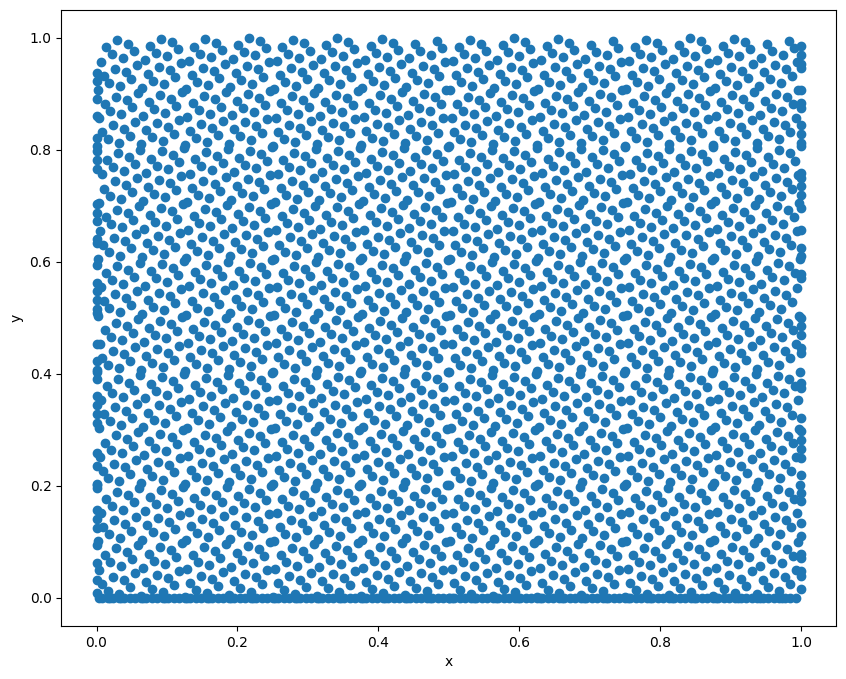

In [33]:
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [34]:
model = dde.Model(data, net)

In [35]:
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.084101 s

'compile' took 0.555811 s



In [36]:
losshistory, train_state = model.train(iterations = 15000)

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.36e-04, 6.44e-03, 4.49e-01]    [2.39e-04, 6.44e-03, 4.49e-01]    []  
1000      [1.37e-03, 7.13e-04, 2.89e-04]    [8.18e-04, 7.13e-04, 2.89e-04]    []  
2000      [1.68e-04, 3.68e-05, 2.05e-05]    [1.05e-04, 3.68e-05, 2.05e-05]    []  
3000      [8.55e-05, 2.14e-05, 9.60e-06]    [5.26e-05, 2.14e-05, 9.60e-06]    []  
4000      [1.59e-04, 1.51e-05, 3.40e-05]    [1.04e-04, 1.51e-05, 3.40e-05]    []  
5000      [5.56e-05, 1.01e-05, 6.70e-06]    [3.42e-05, 1.01e-05, 6.70e-06]    []  
6000      [4.27e-05, 7.82e-06, 2.20e-06]    [2.71e-05, 7.82e-06, 2.20e-06]    []  
7000      [3.56e-05, 6.11e-06, 1.83e-06]    [2.28e-05, 6.11e-06, 1.83e-06]    []  
8000      [2.99e-05, 4.88e-06, 1.25e-06]    [1.91e-05, 4.88e-06, 1.25e-06]    []  
9000      [2.74e-05, 4.10e-06, 1.02e-06]    [1.67e-05, 4.10e-06, 1.02e-06]    []  
10000     [2.14e-05, 3.66e-06, 1.77e-06]    [1.38e-05, 3.66e-

In [37]:
#Limited-memory Broyden-Fletcher-Goldfarb-Shanno
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.245867 s

Training model...

Step      Train loss                        Test loss                         Test metric
15000     [1.37e-05, 1.49e-06, 4.66e-07]    [8.28e-06, 1.49e-06, 4.66e-07]    []  
15017     [1.37e-05, 1.49e-06, 4.66e-07]    [8.28e-06, 1.49e-06, 4.66e-07]    []  

Best model at step 13000:
  train loss: 1.49e-05
  test loss: 1.02e-05
  test metric: []

'train' took 0.592727 s



Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


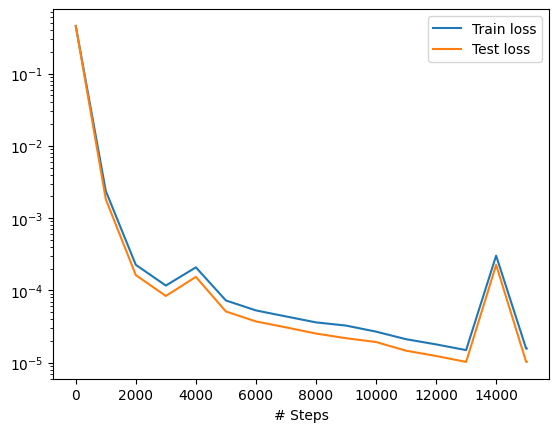

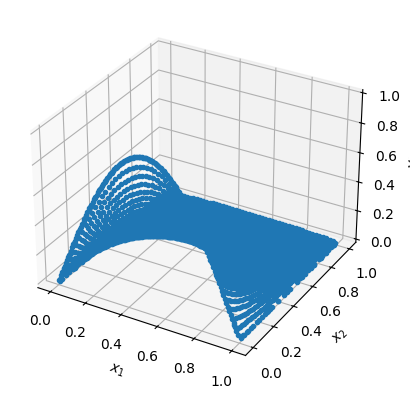

In [38]:
dde.saveplot(losshistory,train_state, issave= True, isplot=True)